# Linear regression

## 1. Load the provided .npy files. You can load it with numpy.

each file contains one vector, X and y
visualize X vs y on a scatter plot
fit an y=w_0 + w_1⋅X + w_2⋅X^2 linear regression using sklearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = np.load('data/X.npy')
y = np.load('data/y.npy')

In [2]:
dat = pd.DataFrame({'y': y,'X': X})
dat

,y,X
0,83.454781,-25.091976
1,579.128860,90.142861
2,87.831523,46.398788
3,34.559137,19.731697
4,285.624528,-68.796272
...,...,...
995,416.495582,-81.683585
996,503.819002,83.462715
997,113.017478,-72.636274
998,578.007804,90.047471


In [3]:
dat["X2"] = dat["X"]**2
dat

,y,X,X2
0,83.454781,-25.091976,629.607271
1,579.128860,90.142861,8125.735440
2,87.831523,46.398788,2152.847561
3,34.559137,19.731697,389.339860
4,285.624528,-68.796272,4732.927029
...,...,...,...
995,416.495582,-81.683585,6672.208113
996,503.819002,83.462715,6966.024811
997,113.017478,-72.636274,5276.028274
998,578.007804,90.047471,8108.546991


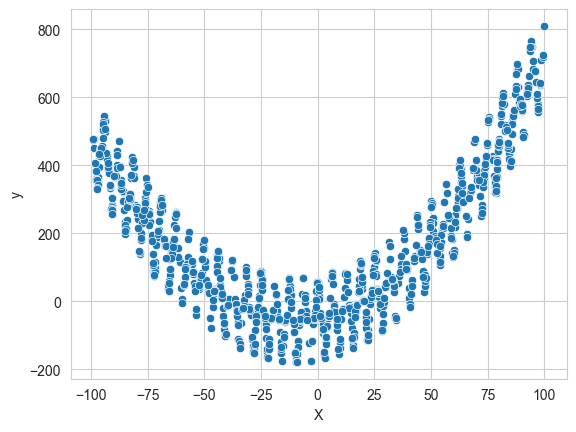

In [4]:
sns.scatterplot(x=dat["X"], y=dat["y"])
plt.show()

In [5]:
X_train_1, X_test_1 ,y_train_1, y_test_1 = train_test_split(dat[["X","X2"]].values,dat[["y"]].values, test_size=0.2)

In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_1, y_train_1)

# Make predictions using the testing set
y_pred_1 = regr.predict(X_test_1)


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_1, y_pred_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_1, y_pred_1))

Coefficients: 
 [[1.18427374 0.06427414]]
Mean squared error: 4853.87
Coefficient of determination: 0.91


## 2. Using different features

plot the residuals (the difference between the prediction and the actual y ) vs the original y
a non-random-noise like pattern suggests non-linear connection between the features and the predictions
someone told us that the connection between X and y is y=A⋅X+B⋅cos^3(X)+C⋅X^2+D
using sklearn's linear regression estimate A,B,C,D !
plot the residuals again! is it better now?

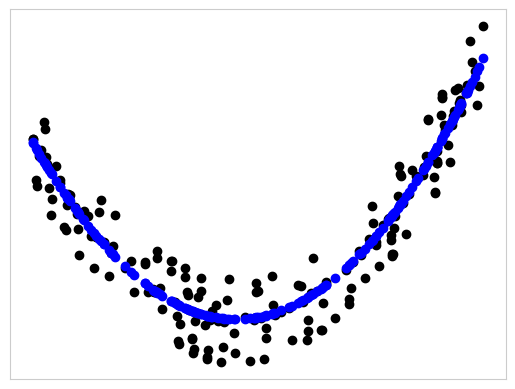

In [7]:
# # Plot outputs
plt.scatter(X_test_1[:,0], y_test_1, color="black")
plt.scatter(X_test_1[:,0], y_pred_1, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
dat["cosX"] = np.cos(dat["X"])**3
dat

,y,X,X2,cosX
0,83.454781,-25.091976,629.607271,0.997510
1,579.128860,90.142861,8125.735440,-0.185966
2,87.831523,46.398788,2152.847561,-0.419235
3,34.559137,19.731697,389.339860,0.256653
4,285.624528,-68.796272,4732.927029,0.856354
...,...,...,...,...
995,416.495582,-81.683585,6672.208113,0.999993
996,503.819002,83.462715,6966.024811,-0.009124
997,113.017478,-72.636274,5276.028274,-0.801240
998,578.007804,90.047471,8108.546991,-0.117643


Coefficients: 
 [[1.19406430e+00 6.56487733e-02 1.23446075e+02]]
Mean squared error: 27.59
Coefficient of determination: 1.00


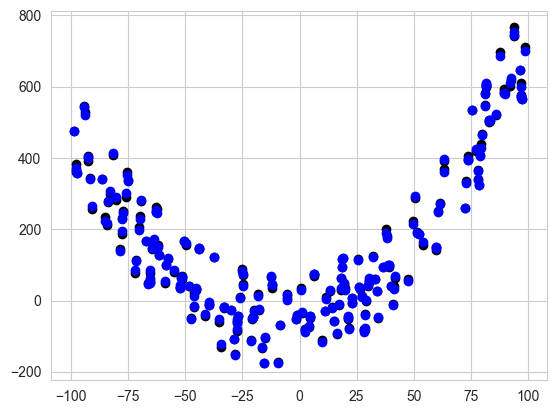

In [9]:
X_train_2, X_test_2 ,y_train_2, y_test_2 = train_test_split(dat[["X","X2","cosX"]].values,dat[["y"]].values, test_size=0.2)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_2, y_train_2)

# Make predictions using the testing set
y_pred_2 = regr.predict(X_test_2)


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_2, y_pred_2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_2, y_pred_2))
# # Plot outputs
plt.scatter(X_test_2[:,0], y_test_2, color="black")
plt.scatter(X_test_2[:,0], y_pred_2, color="blue")
# plt.savefig("cos3X.png")
plt.show()

In [10]:
regr.intercept_

array([-49.95988318])

In [29]:
A_sklearn = regr.coef_[0,0]
B_sklearn = regr.coef_[0,1]
C_sklearn = regr.coef_[0,2]
D_sklearn = regr.intercept_[0]


1.6608104100541927
-3.048094790836604
-6.832352088588262
37.98724827097165



## 3. Other methdods than sklearn for linear regression

using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
                                                                           is the result the same? if not guess, why? (did you not forget to add the constant term?)
try to get the same results with statsmodels as with sklearn!
using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

In [12]:
import statsmodels.api as sm
X = sm.add_constant(X_train_2)
model = sm.OLS(y_train_2,X_train_2)
results = model.fit()
results.params

array([1.18638441e+00, 5.73573148e-02, 1.22247159e+02])

In [13]:
A_statmodels = results.params[0]
B_statmodels = results.params[1]
C_statmodels = results.params[2]
D_statmodels = regr.intercept_[0]

print(f"""
Sklearn:
A : {A_sklearn}
B : {B_sklearn}
C : {C_sklearn}
D : {D_sklearn}

Statmodels:
A : {A_statmodels}
B : {B_statmodels}
C : {C_statmodels}
D : {D_statmodels}
""")


Sklearn:
A : 1.1940643049299149
B : 0.06564877334828065
C : 123.44607537384103
D : -49.959883176784246

Statmodels:
A : 1.186384410264858
B : 0.057357314777201754
C : 122.24715911910894
D : -49.959883176784246



In [14]:
t_test = results.t_test(X_test_2)
t_test

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           263.4694      2.488    105.899      0.000     258.586     268.353
c1           248.4310      3.375     73.617      0.000     241.807     255.055
c2           519.8727      3.598    144.472      0.000     512.809     526.936
c3           142.3922      1.438     98.987      0.000     139.569     145.216
c4            90.3809      1.687     53.565      0.000      87.069      93.693
c5           120.2669      2.443     49.233      0.000     115.472     125.062
c6           -39.1011      2.146    -18.225      0.000     -43.313     -34.890
c7           228.9652      2.160    105.998      0.000     224.725     233.205
c8           164.8105      2.160     76.292      0.000     160.570     169.051

In [15]:
y_pred_OLS = results.predict(X_test_2)
y_pred_OLS

array([ 2.63469380e+02,  2.48431047e+02,  5.19872724e+02,  1.42392222e+02,
        9.03808960e+01,  1.20266907e+02, -3.91010744e+01,  2.28965213e+02,
        1.64810507e+02,  1.17247117e+02, -8.15585559e+01,  1.23204622e+02,
        3.82159777e+02,  2.36893904e+01,  1.68996378e+02,  6.75513302e+01,
        4.64008990e-01,  5.45963324e+02,  1.61432898e+02,  3.98631517e+02,
        2.26269371e+02,  1.96399096e+02,  8.64836264e+01,  2.08036592e+02,
        3.38355134e+02,  1.89652451e+02,  1.38706750e+02,  6.17290615e+01,
        2.65734452e+02,  1.03968522e+02,  1.40978474e+02,  1.96037587e+02,
        6.68858291e+02, -8.08257937e+01,  2.61196093e+00,  1.22192147e+02,
        4.00001469e+00, -1.52410381e+00,  7.85646897e+01,  4.07560811e+02,
        3.29433017e+02,  1.35357840e+02,  2.34042358e+01,  5.97761617e+02,
        2.15909652e+02,  3.77074499e+02,  5.72591379e+02,  1.00704717e+02,
        2.79926247e+01, -1.26716789e+02,  4.98118372e+02,  1.68253851e+02,
        6.90367835e+01,  

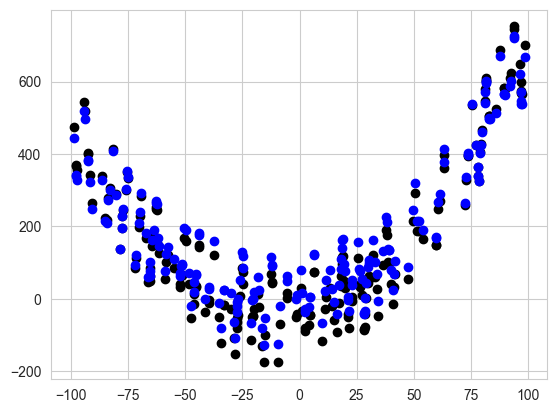

In [16]:
plt.scatter(X_test_2[:,0], y_pred_2, color="black")
plt.scatter(X_test_2[:,0], y_pred_OLS, color="blue")
plt.show()

In [17]:
test_predictions = pd.DataFrame({'sklearn': y_pred_2.ravel().tolist(),'statmodels': y_pred_OLS.ravel().tolist()})
test_predictions

,sklearn,statmodels
0,247.112504,263.469380
1,265.209195,248.431047
2,544.031274,519.872724
3,119.638791,142.392222
4,42.500848,90.380896
...,...,...
195,-51.604568,-11.336760
196,11.297243,55.072185
197,329.517171,335.351799
198,582.198530,565.128651


In [18]:
w = np.dot(np.linalg.inv(np.dot(X_train_2.T, X_train_2)), np.dot(X_train_2.T, y_train_2))
w

array([[1.18638441e+00],
       [5.73573148e-02],
       [1.22247159e+02]])

In [19]:
print(f"""
Sklearn:
A : {A_sklearn}
B : {B_sklearn}
C : {C_sklearn}
D : {D_sklearn}

Statmodels:
A : {A_statmodels}
B : {B_statmodels}
C : {C_statmodels}
D : {D_statmodels}

Analytic:
A : {w[0][0]}
B : {w[1][0]}
C : {w[2][0]}
D : {D_sklearn}
""")


Sklearn:
A : 1.1940643049299149
B : 0.06564877334828065
C : 123.44607537384103
D : -49.959883176784246

Statmodels:
A : 1.186384410264858
B : 0.057357314777201754
C : 122.24715911910894
D : -49.959883176784246

Analytic:
A : 1.1863844102648644
B : 0.057357314777201816
C : 122.24715911910897
D : -49.959883176784246



## 4.

load the real_estate data to a pandas dataframe drop the ID column and the geographic location columns fit a linear regression model to predict the unit price using sklearn
interpret the coefficients and their meaning shortly with your own words
plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?

In [20]:
real_estate = pd.read_csv("data/real_estate.csv",header=0)
real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [21]:
real_estate = real_estate.drop(columns=["No","X5 latitude","X6 longitude"])
real_estate

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


Coefficients: 
 [[ 1.66081041 -3.04809479 -6.83235209  3.95411748]]
Mean squared error: 52.24
Coefficient of determination: 0.63


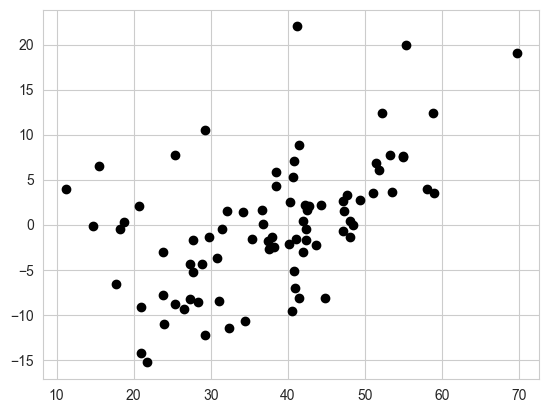

In [22]:
from sklearn.preprocessing import StandardScaler
X_real_estate = real_estate[["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station","X4 number of convenience stores"]].values
X = StandardScaler().fit_transform(X_real_estate)
y = real_estate[["Y house price of unit area"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


# # Plot outputs
fig, ax = plt.subplots()
residuals = []
for index, value in enumerate(y_pred):
    residuals.append(y_test[index,0] - value)
ax.scatter(x=y_test,y=residuals, color="black")

plt.show()

## 5.

Using the same dataset from task 4) compute the parameters of the multivariate regression model via gradient descent.
Compare the calculated parameters with the ones obtained in task 4) via sklearn. Is there any difference? If so give your explanation.

In [23]:
#residualplot
'''5. feladat'''
X_gradient = np.array(X)
X_gradient = StandardScaler().fit_transform(X_gradient)  # Scaling is necessary
X_gradient = np.c_[np.ones_like(y), X_gradient]  # Ones stands for constants (theta_{0}) (mint a statmodelsnel, kell egy oszlop 1)
y_gradient = np.array(y)
# initial coefficients are all ones
theta = np.ones(X_gradient.shape[1])[:, np.newaxis]

In [24]:
# NOTE: y and theta vector should be (and here is) a column vector!!
def compute_cost(y, y_pred):
    """
    Calculates the LMSE for a multivariate function.
    """
    m = y.shape[0]

    loss = 0
    for y_pred_i, y_i in zip(y_pred, y):
        loss += (y_pred_i - y_i) ** 2
    return 1 / (2 * m) * loss

In [25]:
def gradient_descent(X, y, theta, alpha, n_iter):
    """
    Implements the naive gradient descent algorithm and calculates loss
    along the way.
    """
    m = y.shape[0]
    # Calculate initial cost
    costs = []

    for i in range(n_iter):
        y_pred = np.dot(X, theta)
        theta = theta - 2 * alpha / m * np.dot(X.T, y_pred - y)
        costs.append(compute_cost(y, y_pred))
    return costs, theta

costs_predict, theta_predict = gradient_descent(X_gradient, y_gradient, theta, 0.005, 2000)

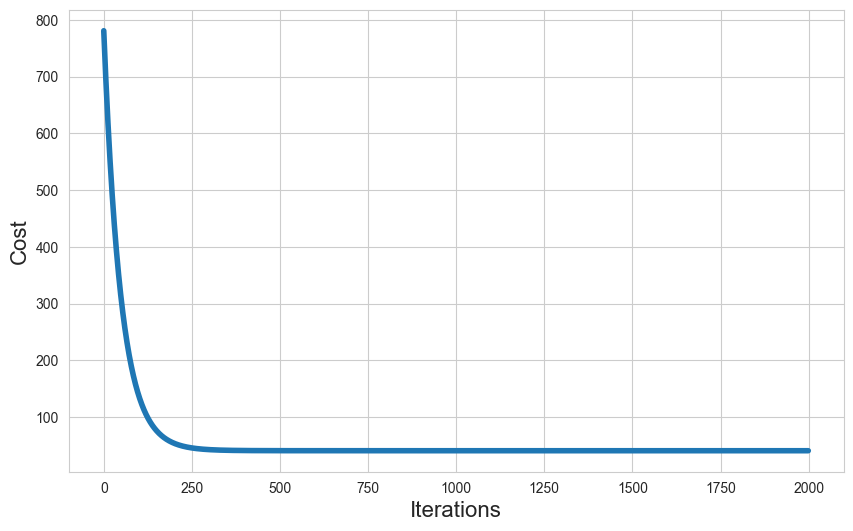

In [26]:
'''cost function plot'''
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(costs_predict, lw=4)

ax.set_xlabel('Iterations', fontsize=16)
ax.set_ylabel('Cost', fontsize=16)

plt.show()

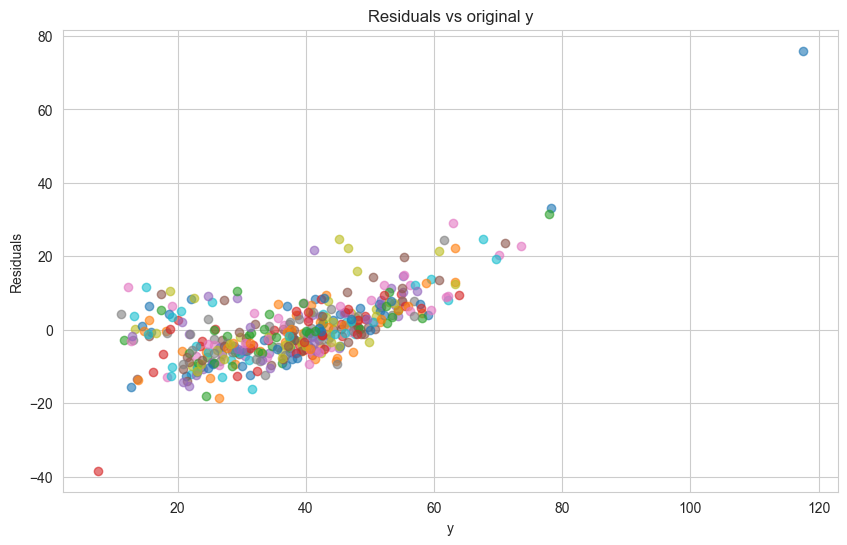

In [27]:
'''make a prediction'''

y_pred_gradient = theta_predict[0] +theta_predict[1]*X_gradient[:,1] + theta_predict[2]*X_gradient[:,2] + theta_predict[3]*X_gradient[:, 3] + theta_predict[4]*X_gradient[:, 4]


'''residuals'''
res_gradient = y.reshape(1,-1) - y_pred_gradient
# # Plot outputs
plt.figure(figsize=(10,6))
plt.plot(y.reshape(1,-1), res_gradient, 'o', alpha=0.6)
plt.xlabel('y')
plt.ylabel('Residuals')
plt.title('Residuals vs original y')
plt.show()

In [28]:
'''print the coefficients'''
print(f'''
Gradient descent based linear regression:
Intercept:{float(theta_predict[0]): .5f}
Coefficients: {theta_predict[1:].reshape(1,-1).tolist()[0]}''')
print(f"""Sklearn linear regression:
Intercept:  {regr.intercept_[0]}
Coefficients: {regr.coef_[0]}""")


Gradient descent based linear regression:
Intercept: 37.98019
Coefficients: [1.6271392391068464, -2.8957512462615975, -6.948608997635087, 3.7016255508143083]
Sklearn linear regression:
Intercept:  37.98724827097165
Coefficients: [ 1.66081041 -3.04809479 -6.83235209  3.95411748]


# Explonation of the result

The gradient descend based linear regression is more stable, because the starting theta is a given constans (1).
In the case of Sklearn the theta is random value, the prediction not the same allways. (we can set it to get the same by random.seed() function)
Overall I could manage to make almost similar prediction like in sklearn.